-----------
Initializing structure...
time for choose_chunkdivision = 0.000337124 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (10,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
time for set_epsilon = 4.46679 s
-----------


FloatProgress(value=0.0, description='0% done ', max=0.0)

run 0 finished at t = 0.0 (0 timesteps)


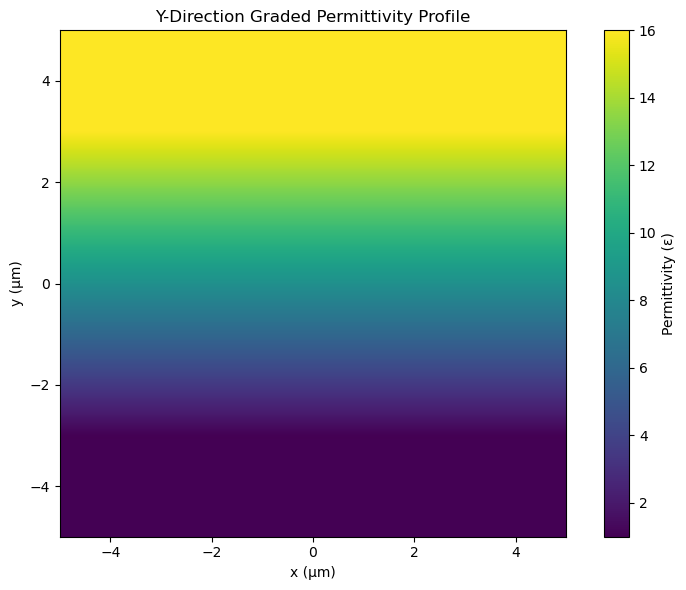

In [5]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
resolution = 20  # pixels/µm
cell_size = mp.Vector3(10, 10, 0)

# Graded region parameters
grading_center_y = 0  # Center y position
grading_height = 6    # Total height of graded region
epsilon_bottom = 1    # Permittivity at bottom (n=1)
epsilon_top = 16      # Permittivity at top (n=4)

# Function to define the graded permittivity (y-direction only)
def graded_y_func(p):
    """
    Defines the spatially dependent permittivity with grading only in y-direction.
    Uniform in x-direction (horizontal), varying in y-direction (vertical).
    """
    # Normalized y position: 0 at bottom, 1 at top of graded region
    y_min = grading_center_y - grading_height / 2
    y_max = grading_center_y + grading_height / 2
    
    # Check if the point is inside the graded region
    if y_min <= p.y <= y_max:
        # Normalized position (0 to 1 from bottom to top)
        normalized_y = (p.y - y_min) / grading_height
        # Linear interpolation from bottom to top
        eps = epsilon_bottom + (epsilon_top - epsilon_bottom) * normalized_y
        return mp.Medium(epsilon=eps)
    elif p.y < y_min:
        # Below graded region
        return mp.Medium(epsilon=epsilon_bottom)
    else:
        # Above graded region
        return mp.Medium(epsilon=epsilon_top)

# Define default material (background)
default_material = mp.Medium(epsilon=epsilon_bottom)

# Create a material function for the entire simulation domain
geometry = [
    mp.Block(
        center=mp.Vector3(0, grading_center_y, 0),
        size=cell_size,
        material=graded_y_func
    )
]

# Set up the simulation
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    geometry=geometry,
    default_material=default_material,
    boundary_layers=[mp.PML(1.0)]  # Add PML boundary conditions
)

# Visualize the permittivity profile
sim.run(until=0)  # Run for 0 steps to initialize geometry
eps_data = sim.get_array(component=mp.Dielectric, center=mp.Vector3(), size=cell_size)

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='viridis',
           extent=[-cell_size.x/2, cell_size.x/2, -cell_size.y/2, cell_size.y/2],
           origin='lower')
plt.colorbar(label='Permittivity (ε)')
plt.title('Y-Direction Graded Permittivity Profile')
plt.xlabel('x (µm)')
plt.ylabel('y (µm)')
plt.tight_layout()
plt.show()